## Importing the necessary libraries
These are the libraries we gonna use to build our enire machine learning project

In [1]:
import pandas as pd
import numpy as np
import mlflow
import optuna
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


c:\Users\hp\OneDrive\Desktop\MlProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset loading...

In [2]:
data = pd.read_csv('C:/Users/hp/OneDrive/Desktop/MlProject/data/credit_card_fraud_10k.csv')
data.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


## General information of the dataset
**Observation:** Has 20000 records, 13 columns with 0 null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


## Statistical summary of the data

In [4]:
data.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


The column 'transaction_id' has no contribution to the dependent variable, so it's dropped

In [5]:
data.drop(columns=['transaction_id'], inplace=True)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.columns

Index(['amount', 'transaction_hour', 'merchant_category',
       'foreign_transaction', 'location_mismatch', 'device_trust_score',
       'velocity_last_24h', 'cardholder_age', 'is_fraud'],
      dtype='object')

# EDA(Visualizations)
## Amount distribution
**Objective**

To examine how frequent the amount of transactions are distributed.

**Description of plot**

This is a distribution plot from the seaborn library; figure-level function for plotting distribution of data, for out case we use Kerned Density Estimate.

The 'X-axis' shows the amount transacted while the 'Y-axis' shows the frequency distibution.

**Observation**

The frequency of transaction decreases as the amount increaes.

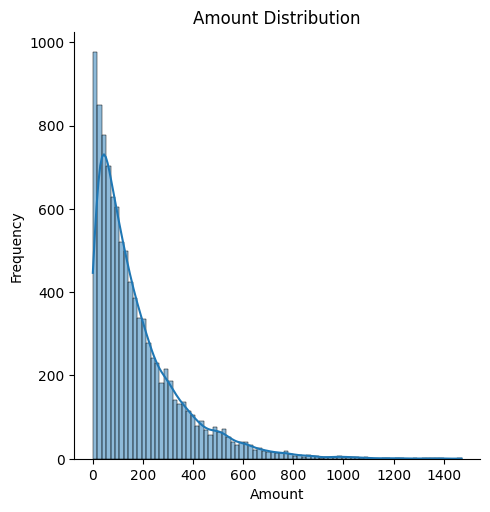

In [8]:
sns.displot(data['amount'], kde=True)
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

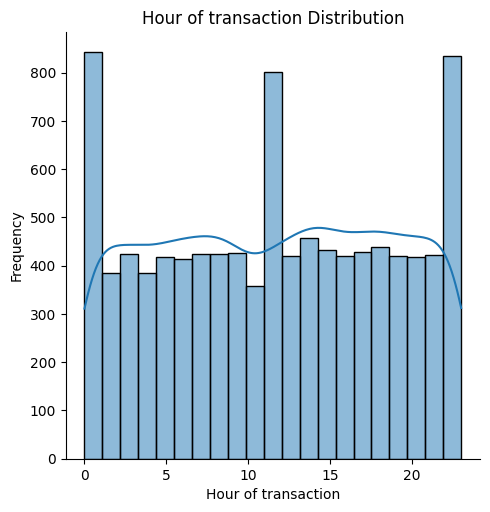

In [9]:
sns.displot(data['transaction_hour'], kde=True)
plt.title('Hour of transaction Distribution')
plt.xlabel('Hour of transaction')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Merchant Category')

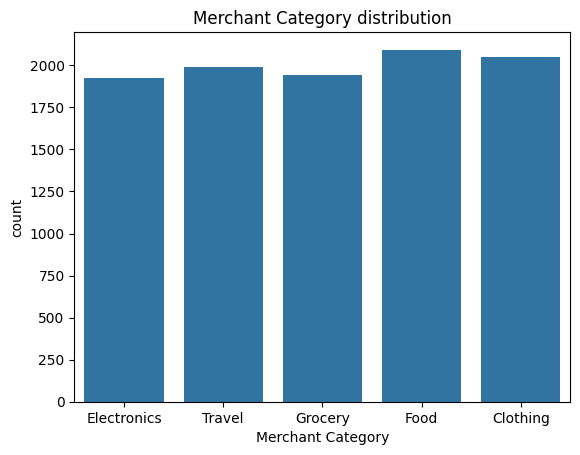

In [10]:
sns.countplot(x = data['merchant_category'])
plt.title('Merchant Category distribution')
plt.xlabel('Merchant Category')

In [11]:
data.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,84.47,22,Electronics,0,0,66,3,40,0
1,541.82,3,Travel,1,0,87,1,64,0
2,237.01,17,Grocery,0,0,49,1,61,0
3,164.33,4,Grocery,0,1,72,3,34,0
4,30.53,15,Food,0,0,79,0,44,0


Text(0, 0.5, 'Count')

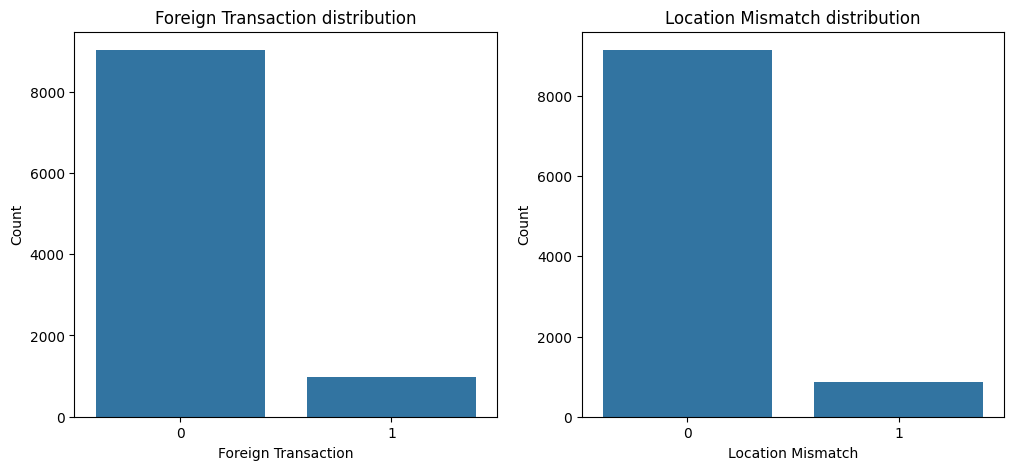

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x = data['foreign_transaction'],ax=ax[0])
ax[0].set_title("Foreign Transaction distribution")
ax[0].set_xlabel("Foreign Transaction")
ax[0].set_ylabel("Count")

sns.countplot(x = data['location_mismatch'],ax=ax[1])   
ax[1].set_title("Location Mismatch distribution")
ax[1].set_xlabel("Location Mismatch")
ax[1].set_ylabel("Count")

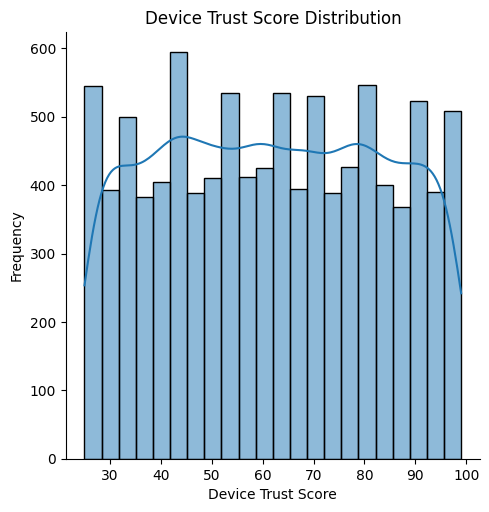

In [13]:
sns.displot(data['device_trust_score'], kde=True)
plt.title('Device Trust Score Distribution')    
plt.xlabel('Device Trust Score')
plt.ylabel('Frequency') 
plt.show()

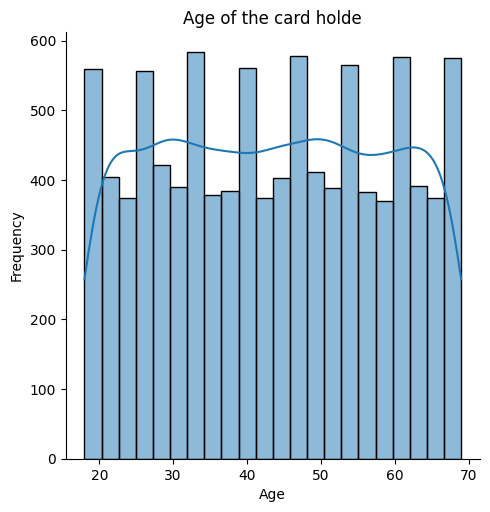

In [14]:
sns.displot(data['cardholder_age'], kde=True)
plt.title('Age of the card holde')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

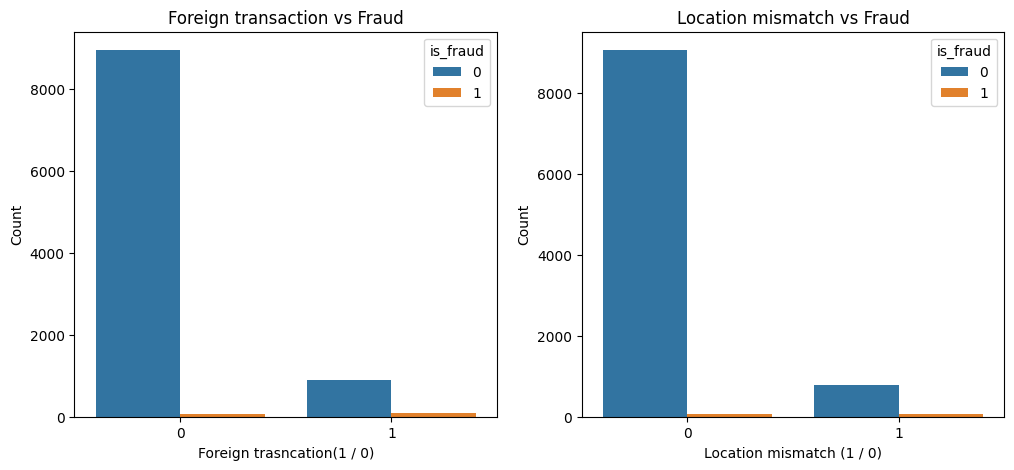

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(
    data = data,
    x = 'foreign_transaction',
    hue = "is_fraud",
    ax = ax[0]
)

ax[0].set_title("Foreign transaction vs Fraud")
ax[0].set_xlabel("Foreign trasncation(1 / 0)")
ax[0].set_ylabel("Count")
sns.countplot(
    data = data,
    x = 'location_mismatch',
    hue = "is_fraud",
    ax = ax[1]
)       
ax[1].set_title("Location mismatch vs Fraud")
ax[1].set_xlabel("Location mismatch (1 / 0)")
ax[1].set_ylabel("Count")
plt.show()

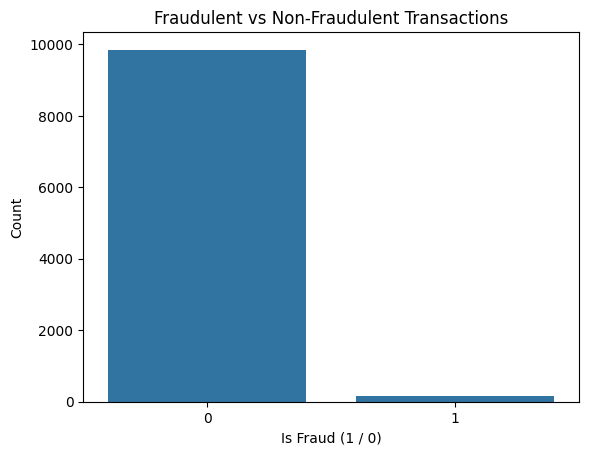

In [16]:
sns.countplot(
    data = data,
    x = 'is_fraud')
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Is Fraud (1 / 0)")
plt.ylabel("Count")
plt.show()

In [17]:
encoder = LabelEncoder()
data['merchant_category'] = encoder.fit_transform(data['merchant_category'])
print("Merchant category classes:", encoder.classes_)
print(f'Int mappings: {list(range(len(encoder.classes_)))}')

Merchant category classes: ['Clothing' 'Electronics' 'Food' 'Grocery' 'Travel']
Int mappings: [0, 1, 2, 3, 4]


In [18]:
data.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,84.47,22,1,0,0,66,3,40,0
1,541.82,3,4,1,0,87,1,64,0
2,237.01,17,3,0,0,49,1,61,0
3,164.33,4,3,0,1,72,3,34,0
4,30.53,15,2,0,0,79,0,44,0


In [19]:
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
numeric_cols = ['amount', 'transaction_hour', 'device_trust_score', 'cardholder_age']
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [22]:
linear_model = LogisticRegression(max_iter=1000)
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1970
           1       1.00      0.40      0.57        30

    accuracy                           0.99      2000
   macro avg       1.00      0.70      0.78      2000
weighted avg       0.99      0.99      0.99      2000



In [23]:
mlflow.set_tracking_uri("http://localhost:5000")

In [24]:
def objective(trial):
    with mlflow.start_run(nested=True, run_name=f"trial_{trial.number}") as child_run:

        params = {
            "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),
            "C": trial.suggest_float("C", 0.01, 10.0, log=True),
            "class_weight": trial.suggest_categorical("class_weight", [None, "balanced"]),
            "solver": trial.suggest_categorical("solver", ["liblinear", "saga"]),
            "max_iter": trial.suggest_int("max_iter", 100, 3000, step=100),
        }

        mlflow.log_params(params)

        model = LogisticRegression(**params)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        mlflow.log_metrics({
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "accuracy": accuracy
        })

        mlflow.sklearn.log_model(model, "model")

        trial.set_user_attr("run_id", child_run.info.run_id)

        return f1


In [25]:
with mlflow.start_run(run_name="study"):

    n_trials = 30
    mlflow.log_param("n_trials", n_trials)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    mlflow.log_params(study.best_trial.params)
    mlflow.log_metric("best_f1", study.best_value)

    if best_run_id := study.best_trial.user_attrs.get("run_id"):
        mlflow.log_param("best_child_run_id", best_run_id)



[I 2025-12-28 18:05:55,657] A new study created in memory with name: no-name-e7f364da-e1ef-49ab-aa55-07b1fbd520f4
2025/12/28 18:06:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:07:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run trial_0 at: http://localhost:5000/#/experiments/0/runs/7c5be200ba07455f96c3559c440b6c7e
🧪 View experiment at: http://localhost:5000/#/experiments/0


[I 2025-12-28 18:07:26,509] Trial 0 finished with value: 0.6956521739130435 and parameters: {'penalty': 'l2', 'C': 2.2796698655322998, 'class_weight': None, 'solver': 'saga', 'max_iter': 300}. Best is trial 0 with value: 0.6956521739130435.
c:\Users\hp\OneDrive\Desktop\MlProject\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
2025/12/28 18:07:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:08:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:08:04,155] Trial 1 finished with value: 0.4793388429752066 and parameters: {'penalty': 'l1', 'C': 0.19728512326652006, 'class_weight': 'balanced', 'solver': 'saga', 'max_iter': 700}. Best is trial 0 with value: 0.6956521739130435.


🏃 View run trial_1 at: http://localhost:5000/#/experiments/0/runs/c07da10d066e46488f2368bd5f8b77eb
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:08:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:08:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run trial_2 at: http://localhost:5000/#/experiments/0/runs/8fe5e311d38c47f99fd55a491ecc30b4
🧪 View experiment at: http://localhost:5000/#/experiments/0


[I 2025-12-28 18:08:29,728] Trial 2 finished with value: 0.4195804195804196 and parameters: {'penalty': 'l1', 'C': 1.5042702374976151, 'class_weight': 'balanced', 'solver': 'liblinear', 'max_iter': 900}. Best is trial 0 with value: 0.6956521739130435.
c:\Users\hp\OneDrive\Desktop\MlProject\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
2025/12/28 18:08:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:09:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:09:08,792] Trial 3 finished with value: 0.4496124031007752 and parameters: {'penalty': 'l2', 'C': 5.05988281040951, 'class_weight': 'balanced', 'solver': 'saga', 'max_iter': 1300}. Best is trial 0 with value: 0.6956521739130435.


🏃 View run trial_3 at: http://localhost:5000/#/experiments/0/runs/7528602789b64347b0e2dde229e6e884
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:09:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:09:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:09:32,381] Trial 4 finished with value: 0.7346938775510204 and parameters: {'penalty': 'l1', 'C': 0.598894300754307, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 200}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_4 at: http://localhost:5000/#/experiments/0/runs/a075cb894fca4cc584304d5f977d47ab
🧪 View experiment at: http://localhost:5000/#/experiments/0


c:\Users\hp\OneDrive\Desktop\MlProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
2025/12/28 18:09:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:09:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:09:56,334] Trial 5 finished with value: 0.0 and parameters: {'penalty': 'l1', 'C': 0.0401982126671124, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 800}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_5 at: http://localhost:5000/#/experiments/0/runs/61fbcb93ec4946fca581f85ec1d439ab
🧪 View experiment at: http://localhost:5000/#/experiments/0


c:\Users\hp\OneDrive\Desktop\MlProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
2025/12/28 18:09:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:10:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:10:21,652] Trial 6 finished with value: 0.0 and parameters: {'penalty': 'l1', 'C': 0.017822935006435826, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 700}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_6 at: http://localhost:5000/#/experiments/0/runs/0355bf332cb74af48e44acca96c5617b
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:10:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:10:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:10:44,398] Trial 7 finished with value: 0.7058823529411765 and parameters: {'penalty': 'l2', 'C': 4.71269536760586, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 300}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_7 at: http://localhost:5000/#/experiments/0/runs/087982d53a274842aa7f31374904f9ee
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:10:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:11:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run trial_8 at: http://localhost:5000/#/experiments/0/runs/ef8c10403ce64a8388bb946bff9a650c
🧪 View experiment at: http://localhost:5000/#/experiments/0


[I 2025-12-28 18:11:11,915] Trial 8 finished with value: 0.7058823529411765 and parameters: {'penalty': 'l2', 'C': 6.011723717191441, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 2700}. Best is trial 4 with value: 0.7346938775510204.
2025/12/28 18:11:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:11:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:11:39,147] Trial 9 finished with value: 0.42105263157894735 and parameters: {'penalty': 'l2', 'C': 0.3810691264580185, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 2800}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_9 at: http://localhost:5000/#/experiments/0/runs/aace93ad1ca4478e9c853e9a9ef7a1f7
🧪 View experiment at: http://localhost:5000/#/experiments/0


c:\Users\hp\OneDrive\Desktop\MlProject\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
2025/12/28 18:12:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:12:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:12:31,877] Trial 10 finished with value: 0.5625 and parameters: {'penalty': 'l1', 'C': 0.23177327100156792, 'class_weight': 'balanced', 'solver': 'saga', 'max_iter': 2000}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_10 at: http://localhost:5000/#/experiments/0/runs/3599284e421e436dac5f4a606ff05e91
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:12:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:12:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:13:02,716] Trial 11 finished with value: 0.5365853658536586 and parameters: {'penalty': 'l2', 'C': 0.8064655345831785, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 100}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_11 at: http://localhost:5000/#/experiments/0/runs/cdb593b39c8e4cf181791006e2e0403b
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:13:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:13:25 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:13:28,521] Trial 12 finished with value: 0.6923076923076923 and parameters: {'penalty': 'l2', 'C': 9.793772513466244, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 1600}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_12 at: http://localhost:5000/#/experiments/0/runs/52598f5a30ee4cc882abb48865c7a25c
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:13:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:13:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:13:52,108] Trial 13 finished with value: 0.7346938775510204 and parameters: {'penalty': 'l1', 'C': 0.7020533907046513, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 200}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_13 at: http://localhost:5000/#/experiments/0/runs/c72e0d8ab77b44ff9965be859fe24428
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:13:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:14:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run trial_14 at: http://localhost:5000/#/experiments/0/runs/70935604aa2d4a11b869bb47eff9dac4
🧪 View experiment at: http://localhost:5000/#/experiments/0


[I 2025-12-28 18:14:18,393] Trial 14 finished with value: 0.3333333333333333 and parameters: {'penalty': 'l1', 'C': 0.075963858059711, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 1200}. Best is trial 4 with value: 0.7346938775510204.
2025/12/28 18:14:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:14:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:14:41,590] Trial 15 finished with value: 0.7346938775510204 and parameters: {'penalty': 'l1', 'C': 0.622906853378421, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 2000}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_15 at: http://localhost:5000/#/experiments/0/runs/9229e13fd03a48cf9e74f1aaf575064c
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:14:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:15:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:15:07,646] Trial 16 finished with value: 0.5 and parameters: {'penalty': 'l1', 'C': 0.13889393983705206, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 100}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_16 at: http://localhost:5000/#/experiments/0/runs/a0744d6e19234f439d21efcf961d3e70
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:15:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:15:25 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run trial_17 at: http://localhost:5000/#/experiments/0/runs/b9e6b2b5abf547c5bce84031336d4faf
🧪 View experiment at: http://localhost:5000/#/experiments/0


[I 2025-12-28 18:15:29,267] Trial 17 finished with value: 0.72 and parameters: {'penalty': 'l1', 'C': 1.289656459013261, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 500}. Best is trial 4 with value: 0.7346938775510204.
c:\Users\hp\OneDrive\Desktop\MlProject\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
2025/12/28 18:15:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:16:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:16:20,369] Trial 18 finished with value: 0.3431952662721893 and parameters: {'penalty': 'l1', 'C': 0.5247742608290599, 'class_weight': 'balanced', 'solver': 'saga', 'max_iter': 1200}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_18 at: http://localhost:5000/#/experiments/0/runs/a6c65fcd40b94d0ab44cda51d0de450e
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:16:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:16:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:16:43,823] Trial 19 finished with value: 0.3783783783783784 and parameters: {'penalty': 'l1', 'C': 0.08955150117373308, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 2400}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_19 at: http://localhost:5000/#/experiments/0/runs/1f0da630e31847b3b59824a9bcbd9273
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:16:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:17:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:17:06,566] Trial 20 finished with value: 0.6792452830188679 and parameters: {'penalty': 'l1', 'C': 2.044528687072289, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 1700}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_20 at: http://localhost:5000/#/experiments/0/runs/52615c37883d462e867280eb0fdc1df4
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:17:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:17:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run trial_21 at: http://localhost:5000/#/experiments/0/runs/180ba82bbc1047e78fa07795503de1c4
🧪 View experiment at: http://localhost:5000/#/experiments/0


[I 2025-12-28 18:17:50,415] Trial 21 finished with value: 0.7346938775510204 and parameters: {'penalty': 'l1', 'C': 0.7078990826425627, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 2000}. Best is trial 4 with value: 0.7346938775510204.
2025/12/28 18:17:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:18:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:18:17,138] Trial 22 finished with value: 0.723404255319149 and parameters: {'penalty': 'l1', 'C': 0.4392652099462856, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 2200}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_22 at: http://localhost:5000/#/experiments/0/runs/504295e88fc44cbe8ef22086cbba285f
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:18:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:18:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:18:44,421] Trial 23 finished with value: 0.7346938775510204 and parameters: {'penalty': 'l1', 'C': 0.8210947945603776, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 1800}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_23 at: http://localhost:5000/#/experiments/0/runs/80c99b1e41374c68851292833f5f5460
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:18:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:19:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:19:06,373] Trial 24 finished with value: 0.6956521739130435 and parameters: {'penalty': 'l1', 'C': 0.3301511392656008, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 1000}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_24 at: http://localhost:5000/#/experiments/0/runs/8cfe20404bef4dde9bf734d283bb9542
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:19:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:19:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:19:27,037] Trial 25 finished with value: 0.72 and parameters: {'penalty': 'l1', 'C': 1.2267209484917188, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 500}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_25 at: http://localhost:5000/#/experiments/0/runs/3fa4af0411c241efb5e8bb7a426a4ba9
🧪 View experiment at: http://localhost:5000/#/experiments/0


c:\Users\hp\OneDrive\Desktop\MlProject\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
2025/12/28 18:19:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:20:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:20:09,354] Trial 26 finished with value: 0.3972602739726027 and parameters: {'penalty': 'l1', 'C': 2.517831153934584, 'class_weight': 'balanced', 'solver': 'saga', 'max_iter': 2300}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_26 at: http://localhost:5000/#/experiments/0/runs/3eb869e24f9c4139981c28dbe4520ece
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:20:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:20:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:20:29,299] Trial 27 finished with value: 0.5714285714285714 and parameters: {'penalty': 'l1', 'C': 0.201304395875443, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 3000}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_27 at: http://localhost:5000/#/experiments/0/runs/593d4dbda001427c8e0fb8ff4faafbcc
🧪 View experiment at: http://localhost:5000/#/experiments/0


c:\Users\hp\OneDrive\Desktop\MlProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
2025/12/28 18:20:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:20:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:20:48,989] Trial 28 finished with value: 0.0 and parameters: {'penalty': 'l1', 'C': 0.010020705442605141, 'class_weight': None, 'solver': 'liblinear', 'max_iter': 1500}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_28 at: http://localhost:5000/#/experiments/0/runs/d63c79c4b73c4760849017a40c27577b
🧪 View experiment at: http://localhost:5000/#/experiments/0


2025/12/28 18:20:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/28 18:21:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
[I 2025-12-28 18:21:12,600] Trial 29 finished with value: 0.6792452830188679 and parameters: {'penalty': 'l1', 'C': 2.743863327494041, 'class_weight': None, 'solver': 'saga', 'max_iter': 400}. Best is trial 4 with value: 0.7346938775510204.


🏃 View run trial_29 at: http://localhost:5000/#/experiments/0/runs/afc8d61c59374c25b78dad5bde989e0e
🧪 View experiment at: http://localhost:5000/#/experiments/0
🏃 View run study at: http://localhost:5000/#/experiments/0/runs/541bc5f8b83844aaa67b18e52e81ec16
🧪 View experiment at: http://localhost:5000/#/experiments/0


In [26]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
